# Uncertainty and Risk

## Definitions

Together the three element $\{Ω, \mathcal{F}, \mathbf{P}\}$, form a probability space. A probability space is the formal representation for uncetainty in the model economy.

- $Ω$ is the state space

- $\mathcal{F}$ is a family set with $\Omega \in \mathcal{F}$

- $\mathbf{P}$ is a probability

$\mathbf{P}$ is fixed, the economy is said to be under risk. If it is known to all agents in the economy, the economy is said to have symmetric information.

In general, it is assumed that a financial economy is perfect - no transaction costs, available assets have fixed prices and are available in infinite quantities, everything happens at the speed of light, and agents have complete, symmetric information.

## Numerical Example

Assume now a simple static economy under risk $\{Ω, \mathcal{F}, \mathbf{P}\}$:

- $\Omega\equiv \{u, d\}$
- $\mathcal{F} ≡ 𝝑(Ω)$
- $\mathbf{P}≡\{P(\{u\})=\frac{1}{2}, P(\{d\})=\frac{1}{2}\}$

### Traded assets

The first is a risky asset, the stock, with a certain price today at $S_0=10$ and an uncertain payoff tomorrow in the form of the random variable:

$$ S_1=\begin{cases}S_1^u=20 & \text{if } \omega=u \\
S_1^d = 5 & \text{if } \omega = d
\end{cases}$$

The second is a risk-free asset, the bond, with a certain price today of $B_0=10$ and a certain payoff tomorrow of the following:

$$ B_1=\begin{cases}
B_1^u=11 & \text{if } ω = u \\
B_1^d=11 & \text{if } ω = d
\end{cases}$$

The model economy can then be written as $\mathcal{M}^2=(\{Ω, \mathcal{F}, \mathbf{P}\}, \mathbb{A})$, where $\mathbb{A}$ represents the tradable assets in the form of the price vector $M_0=(S_0,B_0)^T$ today and the market payoff matrix tomorrow of the following:

$$M_1=\begin{pmatrix}S_i^u & B_1^u\\
S_1d & B_1^d\end{pmatrix}$$

### Arbitrrage pricing

One can address the problem of deriving the fair value of a European call option on the stock with a strike price of $K=14.5$. The arbitrage-free value of the European call option $C_0$ is derived by replicating the option's payoff $C_1$ through a portfolio $ϕ$ of the stock and the bond.

In [1]:
import numpy as np

In [2]:
# the price of stock and bond today
S0 = 10
B0 = 10

In [3]:
# the uncertain payoff of the stock and bond tomorrow
S1 = np.array((20, 5))
B1 = np.array((11, 11))

In [4]:
# the market price vector
M0 = np.array((S0, B0))
M0

array([10, 10])

In [5]:
# the market payoff matrix
M1 = np.array((S1, B1)).T
M1

array([[20, 11],
       [ 5, 11]])

In [6]:
# the strike price of the option
K = 14.5

In [7]:
# The uncertain payoff the option
C1 = np.maximum(S1 - K, 0)
C1

array([5.5, 0. ])

In [8]:
# the replication portfolio phi
phi = np.linalg.solve(M1, C1)
phi

array([ 0.36666667, -0.16666667])

In [9]:
# a check whether its payoff is the same as the option's payoff
np.allclose(C1, np.dot(M1, phi))

True

In [10]:
# the price of the replication portfolio is the arbtrage-free price of the option
C0 = np.dot(M0, phi)
C0

2.0

# Expected Utility Theory

## Assumption and Results

EUT is an axiomatic theory, dating back to the seminal work of von Neumann and Morgestern.

### Axioms and normative theory

"An axiom is a proposition regarded as self-evidently true without proof"



### Preference of an agent

Completeness

- The agent can rank all payoffs relative to one another. One of the following must hold true: $A ≻ B$, $A \prec B$, $A∼ B$.

Transitivity

- If there is a third porfolio $\phi_C$ with future payoff $C=\phi_C ⋅ M_1$, it follows from $A \succ B$ and $B \succ C$ that $A \succ C$.

Continuity

- If $ A≻B≻C$, then there exists a number $\alpha \in [0, 1]$ such that $B∼ αA + (1-α)C$

Independence

- From $A∼B$ it follows that $αA+(1-α)C∼αB+(1-α)C$.  Similarly, from $A≻B$ it followa that $αA + (1-α)C ≻ αB + (1-α)C$.

Dominance

- If $C_1=α_1A+(1-α_1)C$ and $C_2=α_2A+(1-α_2)C$. it follows from $A≻C$ and $C_1\succ C_2$ that $α_1 > α_2$.

### Utility functions

$$U:\mathbb{X} → \mathbb{R}_{+}, x ↦ U(x)$$

### Expected utility functions

Von Neumann and Morgenstern show that if the preference of an agent satisfy the precdeing five axioms, then there exists an expeted utility function of the form:

$$U: \mathbb{X} → \mathbb{R}_{+}, x \mapsto E^P(u(x))=\sum_{ω}^{Ω}P(ω)u(x(ω))$$

$u:\mathbb{R}→\mathbb{R}, x↦u(x)$ is monotonically increasing, state-independent function, often called Bernoulli utility, such as $u(x)=\ln(x), u(x)=x$, or $u(x)=x^2$.

### Risk aversion

Arrow-Pratt measure ARA (absolute risk aversion) is defined by the following:
$$ARA(x)=-\frac{u''(x)}{u'(x)}, x≥0$$
$$ARA(x)=-\frac{u''(x)}{u'(x)}\begin{cases}
>0 & \text{risk-averse}\\
=0 & \text{risk-neutral}\\
<0 & \text{risk-loving}
\end{cases}
$$

- Risk-averse : $u(x)=\ln x$
- Risk-neutral: $u(x)=x$
- Risk-loving: $u(x)=x^2$

## Numerical Example

In [11]:
# the risk-averse Bernoulli utility function
def u(x):
    return np.sqrt(x)

In [12]:
# two portfolios with different weights

phi_A = np.array((0.75, 0.25))
phi_D = np.array((0.25, 0.75))

In [13]:
# shows the cost to set up each portfolio is the same
np.dot(M0, phi_A) == np.dot(M0, phi_D)

True

In [14]:
# the uncertain payoff of portfolio A
A1 = np.dot(M1, phi_A)
A1

array([17.75,  6.5 ])

In [15]:
# the uncertain payoff of portfolio D
D1 = np.dot(M1, phi_D)
D1

array([13.25,  9.5 ])

In [16]:
# the probability measure
P = np.array((0.5, 0.5))

In [17]:
# the expected utility function
def EUT(x):
    return np.dot(P, u(x))

In [18]:
# the utility values for the two uncertrain payoffs
EUT(A1)

3.381292321692286

In [19]:
EUT(D1)

3.3611309730623735

In [20]:
# Optimal portfolio

from scipy.optimize import minimize

In [21]:
# the fixed budge of the agent
w = 10

In [22]:
# the budget constraint of use with minimize
cons = {'type': 'eq', 'fun': lambda phi: np.dot(M0, phi) - w}

In [23]:
def EUT_(phi):
    # the expected utility function defined over portfolios
    x = np.dot(M1, phi)
    return EUT(x)

In [24]:
opt = minimize(
    # miniming -EUT_(phi) maximizes EUT_(phi)
    lambda phi: -EUT_(phi),
    # the initial guess for the optimization
    x0=phi_A,
    # the budget contraint applied
    constraints=cons
)

opt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.3850159994933975
       x: [ 6.112e-01  3.888e-01]
     nit: 4
     jac: [-1.692e+00 -1.693e+00]
    nfev: 12
    njev: 4

In [25]:
EUT_(opt['x'])

3.3850159994933975

# Mean-Varince Portfolio Theory



## Assumptions and Results

The central assumption of MVP is that investors only care about expected returns and the variance of these returns.

### Portfolio statistics

$$\mathbb{M}^N=(\{Ω, \mathcal{F}, \mathbf{P}\}, \mathbb{A})$$

- $\mathbb{A}$ consists of $N$ risky assets, $A^1, A^2, ..., A^N$.
- With $A_0^n$ being the fixed price of asset $n$ today and $A_1^n$ being its payoff in one year.
- The net return $r^n$ of asset $n$ is defined as $r^n=\frac{A_1^n}{A_0^n}-1$

For all future states having the same probability to unfold, the expected return of asset $n$ is given by:

$$ \mu^n=\frac{1}{|Ω|\sum_{\omega}^Ω r^n(\omega)}$$

The vector of expected returns is given by the following:

$$\mu=\begin{bmatrix}
\mu^1\\
\mu^2\\
\mu^3\\
\vdots
\mu^N
\end{bmatrix}$$

A portfolio vector $\phi=(\phi^1, \phi^2, \phi^3, ..., \phi^N)^T$, with $\phi_n\ge0$ and $\sum_n^N\phi^n=1$.

The expected return of the porfolio is given by:

$$\mu^{phi}=\phi ⋅ \mu$$

Define the covariance between assets $n$ and $m$ by the following:

$$
\sigma_{mn} = \sum_{ω}^{Ω}(r^m-\mu^m)(r^n(ω)-\mu^n)
$$

The covariance matrix then is given by:

$$
Σ =\begin{bmatrix}
\sigma_{11} & \sigma_{12} & \cdots & σ_{1n}\\
\sigma_{21} & \sigma_{22} & \cdots & σ_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
\sigma_{n1} & \sigma_{n2} & \cdots & σ_{nn}\\
\end{bmatrix}
$$

The expected variance of the portfolio is then given by the double dot prodcut:

$$ φ^{phi} = \phi^T⋅Σ⋅ϕ $$

The expected volatility of the portfolio is the following:

$$σ^{phi}=\sqrt{φ^{phi}}$$

### Sharpe ratio

$$ π^{phi}=\frac{\mu^{phi}}{\sigma^{phi}} $$

If $r$ represents the risk-less short rate, the risk premium or excess return of a portfolio $phi$ over a risk-free alternative is defined by $\mu^{phi}-r$. This risk premium is the numerator.

$$\pi^{phi}=\frac{\mu^{phi}-r}{\sigma^{phi}}$$

## Numerical Example

### Portfolio statistics

In [26]:
# return vector of the risky asset
rS = S1 / S0 - 1
rS

array([ 1. , -0.5])

In [27]:
# return vector of the risk-less aseet
rB = B1 / B0 - 1
rB

array([0.1, 0.1])

In [28]:
# expected return function
def mu(rX):
    return np.dot(P, rX)

In [29]:
# expected returns of the traded assets
mu(rS)

0.25

In [30]:
mu(rB)

0.10000000000000009

In [31]:
# return matrix for the traded assets
rM = M1 / M0 - 1
rM

array([[ 1. ,  0.1],
       [-0.5,  0.1]])

In [32]:
# expected return vector
mu(rM)

array([0.25, 0.1 ])

In [33]:
# the variance and volatility

def var(rX):
    # the variance function
    return ((rX - mu(rX)) ** 2).mean()

var(rS)

0.5625

In [34]:
var(rB)

0.0

In [35]:
def sigma(rX):
    return np.sqrt(var(rX))

In [36]:
sigma(rS)

0.75

In [37]:
sigma(rB)

0.0

In [38]:
# the covariance matrix

np.cov(rM.T, aweights=P, ddof=0)

array([[0.5625, 0.    ],
       [0.    , 0.    ]])

In [39]:
# the porfolio expected return, porfolio expected variance

phi = np.array((0.5, 0.5))

# the porfolio expected return
def mu_phi(phi):
    return np.dot(phi, mu(rM))

mu_phi(phi)

0.17500000000000004

In [40]:
def var_phi(phi):
    cv = np.cov(rM.T, aweights=P, ddof=0)
    return np.dot(phi, np.dot(cv, phi))

var_phi(phi)

0.140625

In [41]:
def sigma_phi(phi):
    return var_phi(phi) ** 0.5

sigma_phi(phi)

0.375

### Investment opportynity set

In [42]:
# monte carlo simulation for the portfolio weights phi

from pylab import plt, mpl

In [43]:
# random portfolio compositions, normalized to 1
phi_mcs = np.random.random((2, 200))

In [44]:
phi_mcs = (phi_mcs / phi_mcs.sum(axis=0)).T

In [45]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi)) for phi in phi_mcs])

Text(0, 0.5, 'expected return')

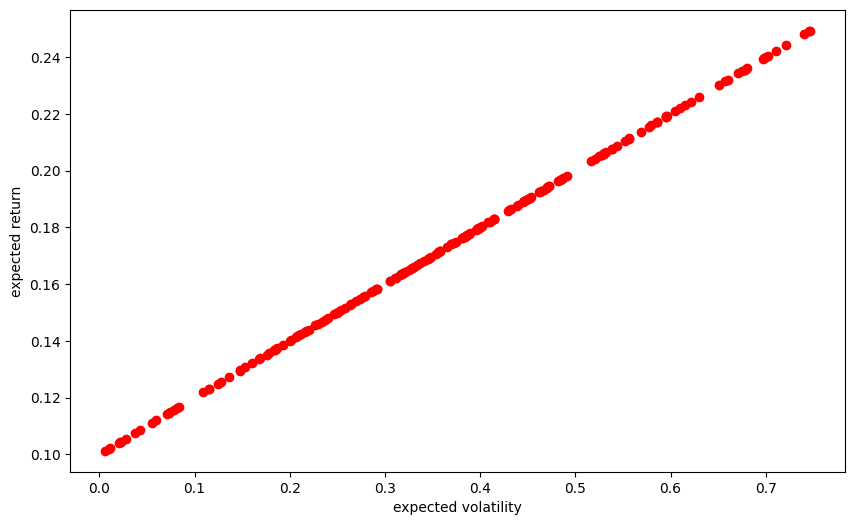

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return')

Consider the case of a static three-state economy $\mathcal{M}^3$ for which $\Omega=\{u, m, d\}$ holds. The three states are equally like $P=\{\frac{1}{3}, \frac{1}{3}, \frac{1}{3}\}$. The set of tradable assets consist of two risky asset $S$ and $T$ with a fixed price of price of $S_0=T_0=10$ and uncertain payoffs of the following:

$$S_1=\begin{bmatrix}20\\10\\5\end{bmatrix}$$

and

$$T_1=\begin{bmatrix}1\\12\\13\end{bmatrix}$$

In [47]:
# New probability measure for three states
P = np.ones(3) / 3
P

array([0.33333333, 0.33333333, 0.33333333])

In [48]:
S1 = np.array((20, 10, 5))

In [49]:
T0 = 10
T1 = np.array((1, 12, 13))

In [50]:
M0 = np.array((S0, T0))
M0

array([10, 10])

In [51]:
M1 = np.array((S1, T1)).T
M1

array([[20,  1],
       [10, 12],
       [ 5, 13]])

In [52]:
rM = M1 / M0 - 1
rM

array([[ 1. , -0.9],
       [ 0. ,  0.2],
       [-0.5,  0.3]])

In [53]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi)) for phi in phi_mcs])

Text(0, 0.5, 'expected return')

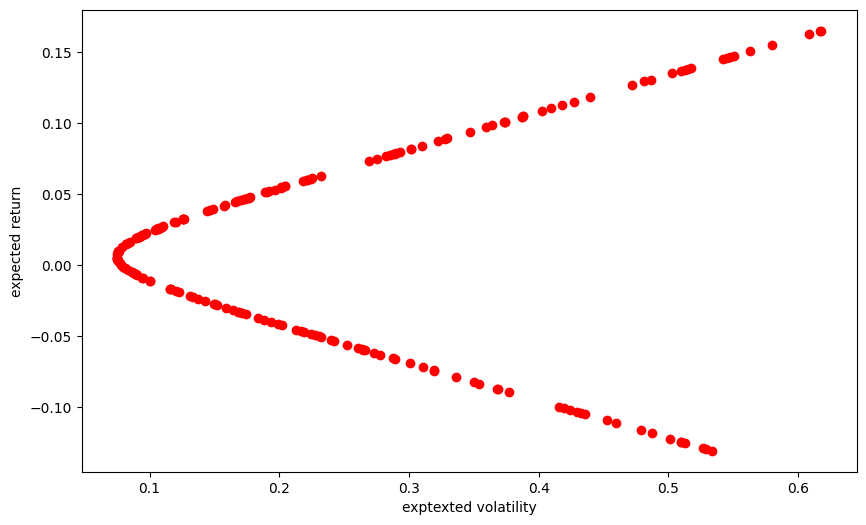

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel('exptexted volatility')
plt.ylabel('expected return')

### Mimum volatility and maximum Sharpe ratio

In [55]:
cons = {'type': 'eq', 'fun': lambda phi: np.sum(phi) - 1}

bnds = ((0, 1), (0, 1))

min_var = minimize(sigma_phi, (0.5, 0.5),
                   constraints=cons,
                   bounds=bnds)

In [56]:
min_var

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.07481322946935583
       x: [ 4.651e-01  5.349e-01]
     nit: 4
     jac: [ 7.427e-02  7.529e-02]
    nfev: 13
    njev: 4

In [57]:
def sharpe(phi):
    return mu_phi(phi) / sigma_phi(phi)

In [58]:
max_sharpe = minimize(lambda phi: -sharpe(phi), (0.5, 0.5),
                      constraints=cons,
                      bounds=bnds)

max_sharpe

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.27216540990401067
       x: [ 6.673e-01  3.327e-01]
     nit: 9
     jac: [ 1.205e-04 -2.417e-04]
    nfev: 29
    njev: 9

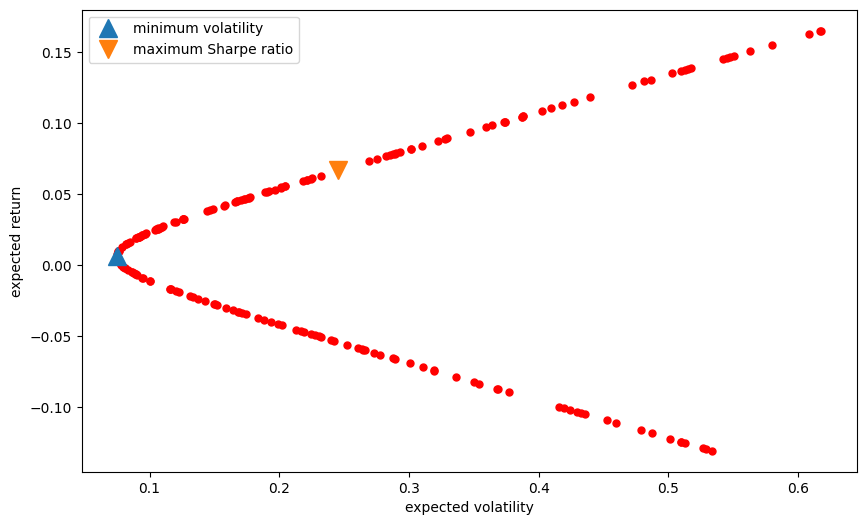

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro', ms=5)
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']), '^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']), 'v', ms=12.5, label='maximum Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend()

### Efficient frontier

An efficient frontier is one that has a maximum expected return givrn its expected risk.

In [60]:
# the new constraint fixes a target level for the expected return
cons = [{'type': 'eq', 'fun': lambda phi: np.sum(phi) - 1},
        {'type': 'eq', 'fun': lambda phi: mu_phi(phi) - target}]

In [61]:
bnds = ((0, 1), (0, 1))

In [62]:
# generates the set of the target expected returns
targets = np.linspace(mu_phi(min_var['x']), 0.16)

In [63]:
frontier = []
for target in targets:
    phi_eff = minimize(sigma_phi, (0.5, 0.5),
                       constraints=cons, bounds=bnds)['x']
    frontier.append((sigma_phi(phi_eff), mu_phi(phi_eff)))
frontier = np.array(frontier)

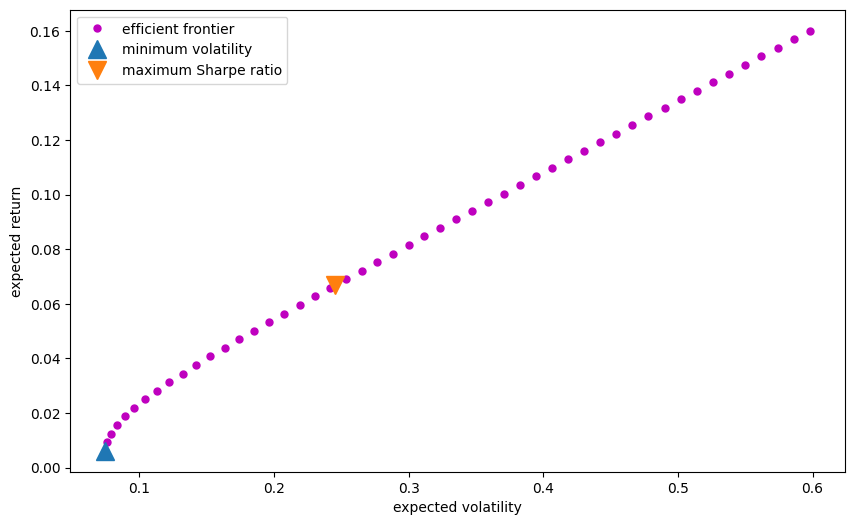

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(frontier[:, 0], frontier[:, 1], 'mo', ms=5, label='efficient frontier')
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']), '^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']), 'v', ms=12.5, label='maximum Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend()

# Capital Asset Pricing Model

The CAPM is attractive as an equilibrium model because of its simplicity and its implications.

## Assumptions and Results

The static model economy from the previous section $\mathcal{M}^N=(\{Ω, \mathcal{F}, \mathbf{P}\}, \mathbb{A})$ with $N$ traded assets and all simplifying assumptions.

Agents are assumed to invest according to MVP, caring only about the risk and return statistics of risky assets over one period.

In a capital market equillibrium, all available assets are held by all agents and the market clear.

Since agents are assumed to be identical in that they use MVP to form their efficient portfolios, this implies that all agents must hold the same efficient portfolio.

The CAPM assumes the existence of (at least) one risk-free asset in which every agent can invest any amount and which earns the risk-free rate of $\bar{r}$.

The set of all portfolios is called the capital market line (CML).

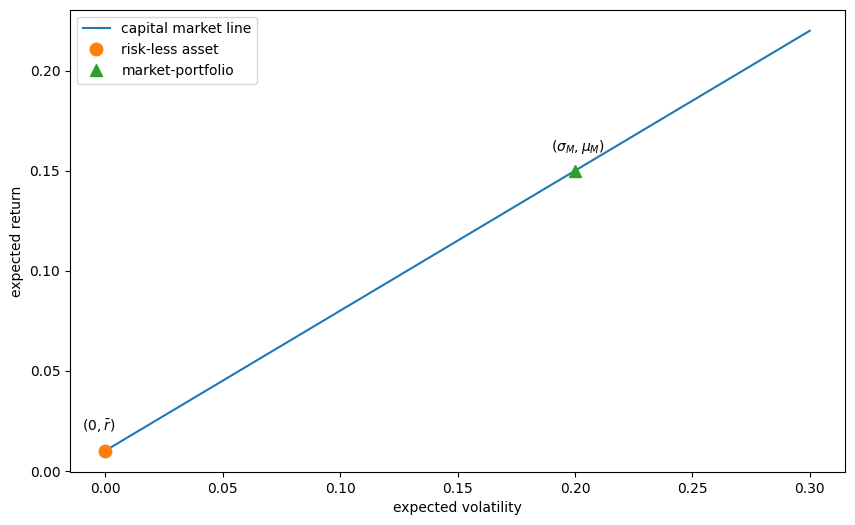

In [65]:
# Capital Market Line

plt.figure(figsize=(10, 6))
plt.plot((0, 0.3), (0.01, 0.22), label='capital market line')
plt.plot(0, 0.01, 'o', ms=9, label='risk-less asset')
plt.plot(0.2, 0.15, '^', ms=9, label='market-portfolio')
plt.annotate('$(0, \\bar{r})$', (0, 0.01), (-0.01, 0.02))
plt.annotate('$(\sigma_M, \mu_M)$', (0.2, 0.15), (0.19, 0.16))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend()

If $\sigma_M$, $\mu_M$ are the expected volatility and return of the market portfolio, the capital market line is defined by the following:

$$μ=\bar{r}+\frac{\mu_M-\bar{r}}{\sigma_M}σ$$

$\frac{μ_M-\bar{r}}{σ_M}$ is called the market price of risk.

The CAPM relates the expected return of any tradable risky asset $n=1,2,..., N$ to the expected return of the market portfolio as follows:

$$μ^n=\bar{r}+\beta_n(\mu_M-\bar{r})$$

$\beta_n$ is defined by the covaraiance of the market portfolio with the risky asset $n$ divided by the variacne of the market portfolio itself:

$$\beta_n=\frac{σ_{M,n}}{σ_M^2}$$

When $\beta_n=0$, the expected return is the risk-free rate. The higher $\beta_n$ is, the higher the expected return for the risky asset will be.

## Numerical Example

Assume the static model economy with three possible future states $\mathcal{M}^3=(\{Ω, \mathcal{F}, \mathbf{P}\}, \mathbb{A})$ with the opportunity to borrow and lend a risk-free rate of $\bar{r}=0.0025$. The two risky assets $S,T$ are available in quantities of 0.8 and 0.2

### Capital market line

In [66]:
phi_M = np.array((0.8, 0.2))

In [67]:
mu_M = mu_phi(phi_M)
mu_M

0.10666666666666666

In [68]:
sigma_M = sigma_phi(phi_M)
sigma_M

0.39474323581566567

In [69]:
r = 0.0025

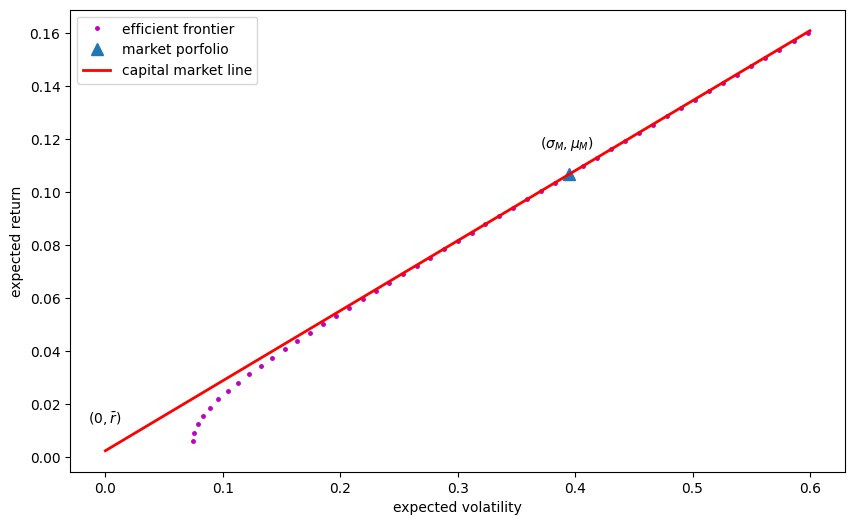

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(frontier[:, 0], frontier[:, 1], 'm.', ms=5, label='efficient frontier')
plt.plot(sigma_M, mu_M, '^', ms=9, label='market porfolio')
plt.plot((0, 0.6), (r, r + ((mu_M - r) / sigma_M) * 0.6), 'r', label='capital market line', lw=2.0)
plt.annotate('$(0, \\bar{r}$)', (0, r), (-0.015, r + 0.01))
plt.annotate('$(\sigma_M, \mu_M$)', (sigma_M, mu_M), (sigma_M - 0.025, mu_M + 0.01))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend()

### Optimal portfolio

Assume an agen with an expected utility function defined over future payoffs as follows:

$$U:\mathbb{X}→, x↦E^P(u(x))=E^P(x-\frac{b}{2}x^2)$$

The expected utility function can be expressed over risk-return combinations:

$$U:\mathbb{R}_+×\mathbb{R}_+→\mathbb{R}(\sigma, \mu)↦\mu-\frac{b}{2}(\sigma^2+\mu^2)$$

In [71]:
# utility maximization
# fixing b = 1

def U(p):
    mu, sigma = p
    # the utility function in risk-return space
    return mu - 1 / 2 * (sigma ** 2 + mu ** 2)

In [72]:
# the condition that the portfolio be on the CML
cons = {'type': 'eq', 'fun': lambda p: p[0] - (r + (mu_M - r) / sigma_M * p[1])}

opt = minimize(lambda p: -U(p), (0.1, 0.3), constraints=cons)
opt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.03488518682673941
       x: [ 6.744e-02  2.461e-01]
     nit: 2
     jac: [-9.326e-01  2.461e-01]
    nfev: 6
    njev: 2

### Indifference curves

An optimal portfolio is found when an indifference curve is tangent to the CML.

In [73]:
from sympy import *

In [74]:
# defines `SymPy` symbols
mu, sigma, b, v = symbols('mu sigma b v')

In [75]:
# solves the utiltity function for \mu
sol = solve('mu - b / 2 * (sigma ** 2 + mu ** 2) - v', mu)

sol

[(1 - sqrt(-b**2*sigma**2 - 2*b*v + 1))/b,
 (sqrt(-b**2*sigma**2 - 2*b*v + 1) + 1)/b]

In [76]:
# substitues numerical values for b, v
u1 = sol[0].subs({'b': 1, 'v': 0.1})
u1

1 - sqrt(0.8 - sigma**2)

In [77]:
u2 = sol[0].subs({'b': 1, 'v': 0.125})
u2

1 - sqrt(0.75 - sigma**2)

In [78]:
# generate callable functions from the resulting eqautions
f1 = lambdify(sigma, u1)
f2 = lambdify(sigma, u2)

In [79]:
# specifies values for \sigma over which to evaluate the functions
sigma_ = np.linspace(0.0, 0.5)
u1_ = f1(sigma_)
u2_ = f2(sigma_)

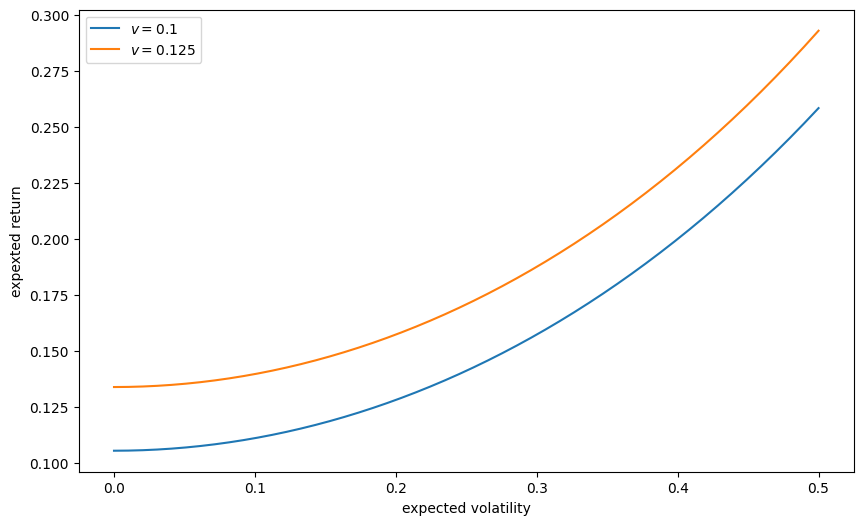

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_, u1_, label='$v=0.1$')
plt.plot(sigma_, u2_, label='$v=0.125$')
plt.xlabel('expected volatility')
plt.ylabel('expexted return')
plt.legend()

In [81]:
# defines the indifference curve for the optimal utility level
u = sol[0].subs({'b':1, 'v': -opt['fun']})
u

1 - sqrt(0.930229626346521 - sigma**2)

In [82]:
f = lambdify(sigma, u)

In [83]:
# derives numerical values to plot the indifference curve
u_ = f(sigma_)

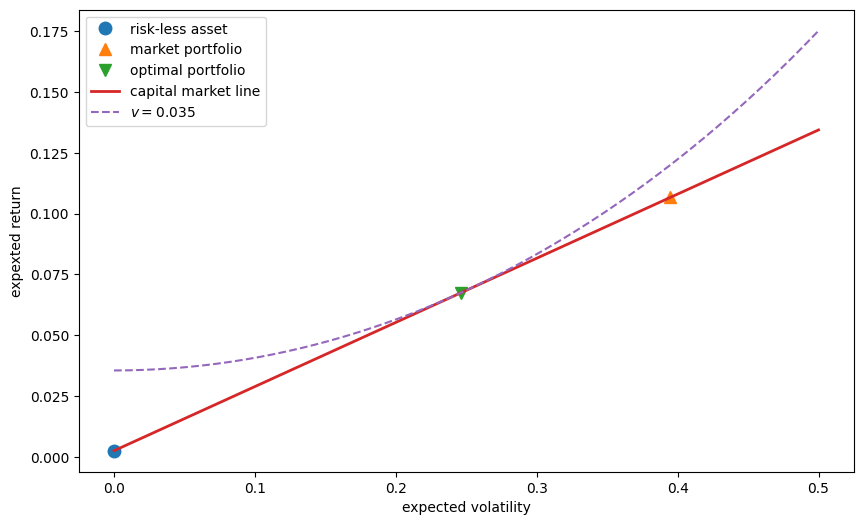

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(0, r, 'o', ms=9, label='risk-less asset')
plt.plot(sigma_M, mu_M, '^', ms=9, label='market portfolio')
plt.plot(opt['x'][1], opt['x'][0], 'v', ms=9, label='optimal portfolio')
plt.plot((0, 0.5), (r, r + (mu_M - r) / sigma_M * 0.5), label='capital market line', lw=2.0)
plt.plot(sigma_, u_, '--', label='$v={}$'.format(-round(opt['fun'], 3)))
plt.xlabel('expected volatility')
plt.ylabel('expexted return')
plt.legend()

# Arbitrage Pricing Theory

The arbitrage model was proposed as an alternative to the mean variance capital asset pricing model, and has become the major analytic tool for explaining phenomena observed in capitl markets for risky assets.

## Assumptions and Results

APT assumes that there are multiple types of risk that together are assued to drive the performance of a stock, such as size, volatility, value, and momentum.

$$y_t=a+Bf_t+ϵ_t$$

$y_t$ is the vector of $M$ observed variables, the expected returns of $M$ different stocks.

$$y_t=\begin{bmatrix}
y_t^1\\y_t^2\\\vdots\\y_t^M
\end{bmatrix}$$

$a$ is the vector of $M$ constant terms:

$$a=\begin{bmatrix}
a^1\\a^2\\\vdots\\a^M
\end{bmatrix}$$

$f_t$ is the vector of $F$ factors at tiem $t$.

$$f_t=\begin{bmatrix}
f_t^1\\f_t^2\\\vdots\\f_t^M
\end{bmatrix}$$

$B$ is the $M×F$ matrix.

$$
B=\begin{bmatrix}
b_{11} & b_{12} & ⋯ & b_{1F}\\
b_{21} & b_{22} & ⋯ & b_{2F}\\
\vdots & \vdots & \ddots & \vdots\\
b_{M1} & b_{M2} & ⋯ & b_{MF}\\
\end{bmatrix}
$$

$ϵ_t$ is the vector of $M$ sufficiently independent residual term

$$\epsilon_t=\begin{bmatrix}
\epsilon_t^1\\\epsilon_t^2\\\vdots\\\epsilon_t^M
\end{bmatrix}$$


From an econometric point of view, CAPM and APT are implemented based on linear ordinary least-squares (OLS) regression. While the CAPM can be implemented based on univariate linear OLS regression, the APT requires multivariate OLS regression.

## Numerical Example

Assume the static model economy with three possible states $\mathcal{M}^3=(\{Ω, \mathcal{F}, \mathbf{P}\}, \mathbb{A})$. The two risky assets are now the relevant risk factors in the economy and introduce a third asset V with the following future payoff:

$$V_1=\begin{bmatrix}12\\15\\7\end{bmatrix}$$



In [85]:
M1

array([[20,  1],
       [10, 12],
       [ 5, 13]])

In [86]:
M0

array([10, 10])

In [87]:
V1 = np.array((12, 15, 7))

In [88]:
# the optimal regression parameter can be interpreted as factor loadings.
reg = np.linalg.lstsq(M1, V1, rcond=-1)[0]
reg

array([0.6141665 , 0.50030531])

In [89]:
np.dot(M1, reg)

array([12.78363525, 12.14532872,  9.57480155])

In [90]:
# The two factors are not enough to explatin the payoff V_1
np.dot(M1, reg) - V1

array([ 0.78363525, -2.85467128,  2.57480155])

In [91]:
# the factor loadings can be used to estimate an arbitrage-free price V_0 for the riskly asset V
V0 = np.dot(M0, reg)
V0

11.144718094850402

The two factors are not enough to fully explain the payoff $V_1$. What about adding a third risk factor $U$ to the model economy? Assume that the third risk factor $U$ is defined by $U_0=10$:

$$U_1=\begin{bmatrix}12\\5\\11\end{bmatrix}$$

In [92]:
U0 = 10
U1 = np.array((12, 5, 11))

In [93]:
# augmented market price vector
M0_ = np.array((S0, T0, U0))

In [94]:
#augmented market payoff matrix with full rank
M1_ = np.concatenate((M1.T, np.array([U1,]))).T
M1_

array([[20,  1, 12],
       [10, 12,  5],
       [ 5, 13, 11]])

In [95]:
np.linalg.matrix_rank(M1_)

3

In [96]:
reg = np.linalg.lstsq(M1_, V1, rcond=-1)[0]
reg

array([ 0.9575179 ,  0.72553699, -0.65632458])

In [97]:
# exact replication of V_1. Residual values are zero
np.allclose(np.dot(M1_, reg), V1)

True

In [98]:
# unique arbitrage-free price for the risky asset V
V0_ = np.dot(M0_, reg)
V0_

10.267303102625304